In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from motif_utils import kmer2seq
import pickle
from css_utility import *

### Problem
* `train.tsv` and `dev.tsv` do not have fixed length, which results in skewed profile of attention score matrix.
* If there is no letter, no score

#### But first I didn't realize it and just wonder why simple pattern like `AAAA` is included in the dataset categorized as "complex" gene
* So I just checked the data

In [27]:
comp_path="../database/temp_files/complexity/thres_mean/comp"
comp=pickle.load(open(comp_path, "rb"))
less_comp_path="../database/temp_files/complexity/thres_mean/less_comp"
less_comp=pickle.load(open(less_comp_path, "rb"))

In [6]:
comp

['MMMMMMMMMMMMMNNNNNNNNNNNNLMMMMMMMMMML',
 'MNNEEEEEEEEEEEEEEEEEEEEEEEEEDDDDDDDEEEEEEEEEEEEEEEEEEEEDDDDDDDDEEEEGGGEAAJJ',
 'JJJJJJMMMNNNNNNNNNNNNN',
 'JJJ',
 'JJJ',
 'MMMJJJMNNNNNNNNMMMNNNNNNNNNNN',
 'MMMJJJMNNNNNNNNMMMNNNNNNNNNNN',
 'AAA',
 'MMMMMMMMMMMNNNNNNNMLLLLL',
 'NNMMMM',
 'NNNNNNNNNMNNN',
 'MMMMMMMMMMMNNNNNNNNNNNNOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGGGGGGGGGBGGGGGGKKJJJ',
 'AAAAAAEEEEEEE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'AAAA',
 'NLMMMLJJJJJMMMMNNNNNNNNNNAAAABGGGGGGGGGGGGGGGGGG',
 'NLMMMLJJJJJMMMMNNNNNNNNNN',
 'NLMMMLJJJJJMMMMNNNNNNNNNNAAAA',
 'NLMMMLJJJJJMMMMNNNNNNNNNNAAAAB',
 'NLMMMLJJJJJMMMMNNNNNNNNNNAAAA',
 'OOO',
 'OOO',
 'OOO',
 'EEEEEEEEEEDDDEEEDDDDDDDDDDDDDDDDDDDDDDDDD

#### Why such simple pattern like 'AAA' is in `comp`?

In [7]:
less_comp

['OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'KMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMKKLLLLMMMMMMMMMMMMMMLLLLLKJJJJJJJMMMMMMMMMMMMMM',
 'AAAAAAAGGGGGGGGGGGG

In [8]:
css_gene_unit_lst_all=pickle.load(open("../database/temp_files/css_gene_unit_lst_all", "rb"))

In [15]:
type(css_gene_unit_lst_all[0])

list

In [21]:
css_gene_unit_lst_all[0][:20]

['OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO',
 'A',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'MMMMMMMMMMMMMNNNNNNNNNNNNLMMMMMMMMMML',
 'KMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMKKLLLLMMMMMMMMMMMMMMLLL

In [19]:
[len(elm) for elm in css_gene_unit_lst_all[0]]

[67,
 1,
 157,
 157,
 157,
 157,
 156,
 37,
 93,
 75,
 22,
 3,
 3,
 29,
 29,
 3,
 162,
 162,
 168,
 24,
 108,
 75,
 75,
 6,
 13,
 92,
 92,
 92,
 92,
 57,
 57,
 76,
 13,
 63,
 63,
 63,
 63,
 63,
 4,
 61,
 48,
 25,
 29,
 30,
 29,
 3,
 3,
 3,
 64,
 31,
 5,
 22,
 15,
 15,
 15,
 4,
 21,
 21,
 21,
 7,
 7,
 102,
 70,
 80,
 80,
 78,
 24,
 157,
 8,
 61,
 61,
 61,
 61,
 61,
 58,
 2,
 423,
 423,
 423,
 423,
 423,
 423,
 154,
 154,
 106,
 106,
 106,
 106,
 106,
 106,
 105,
 92,
 131,
 131,
 142,
 525,
 525,
 525,
 7,
 407,
 17,
 622,
 506,
 504,
 351,
 113,
 44,
 44,
 44,
 44,
 19,
 115,
 19,
 19,
 7,
 399,
 348,
 178,
 80,
 57,
 34,
 34,
 52,
 8,
 8,
 84,
 6,
 63,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 208,
 598,
 40,
 17,
 1744,
 1744,
 99,
 612,
 19,
 93,
 408,
 408,
 408,
 408,
 408,
 408,
 217,
 217,
 217,
 217,
 217,
 217,
 180,
 52,
 52,
 52,
 52,
 52,
 96,
 11,
 11,
 71,
 217,
 114,
 114,
 114,
 48,
 66,
 46,
 510,
 510,
 644,
 644,
 644,
 644,
 461,
 292,
 292,
 251,
 193,
 192,
 390,
 66,
 4,


In [16]:
df=complexity_overview_mat(css_gene_unit_lst_all[0])

In [20]:
df.head(20)

,length,uniq,switch,uniq_pro,switch_pro
0,67,1,1,0.014925,0.014925
2,157,5,8,0.031847,0.050955
3,157,5,8,0.031847,0.050955
4,157,5,8,0.031847,0.050955
5,157,5,8,0.031847,0.050955
6,156,4,7,0.025641,0.044872
7,37,3,5,0.081081,0.135135
8,93,4,9,0.043011,0.096774
9,75,7,11,0.093333,0.146667
10,22,3,3,0.136364,0.136364


In [22]:
df_test=df[df["length"]>=10]

In [23]:
df_test.head(20)

,length,uniq,switch,uniq_pro,switch_pro
0,67,1,1,0.014925,0.014925
2,157,5,8,0.031847,0.050955
3,157,5,8,0.031847,0.050955
4,157,5,8,0.031847,0.050955
5,157,5,8,0.031847,0.050955
6,156,4,7,0.025641,0.044872
7,37,3,5,0.081081,0.135135
8,93,4,9,0.043011,0.096774
9,75,7,11,0.093333,0.146667
10,22,3,3,0.136364,0.136364


In [24]:
len(df_test)

4063

In [25]:
len(df)

4380

#### Well, `AAAA` was included becuase the `switch_pro` is higher than their mean value, which makes sense.. I defined the criteria as "no. of switching/total length" and the mean value is only ~0.1 or something.

### The real problem is that fine tuning was conducted wrong with the previous dataset. I need fixed length of them. 
But there are some problems:
* To make them in fixed length, I need to concatenate the pattern, if it is too short.

So there are two ways:

* One, remove the short pattern and we just deal with long patterns
* Two, concatenate it and see what happends

... Or another option can be reduce the attention matrix size?

In [28]:
# First, I need to check whether dataset has enough number that we can remove the shorter patterns:
len(comp)

13484

(array([1.2734e+04, 5.3100e+02, 1.2600e+02, 3.5000e+01, 1.6000e+01,
        2.2000e+01, 1.5000e+01, 0.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([   2. ,  159.5,  317. ,  474.5,  632. ,  789.5,  947. , 1104.5,
        1262. , 1419.5, 1577. ]),
 <BarContainer object of 10 artists>)

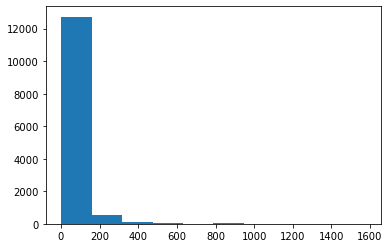

In [31]:
# Well, for DNABERT, sample data for train.tsv has 32367 (dev.tsv has 1001)
# Anywhy, the length?
plt.hist([len(elm) for elm in comp])

(array([3770., 2268., 1697., 1254.,  755.,  680.,  506.,  354.,  319.,
         263.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <BarContainer object of 10 artists>)

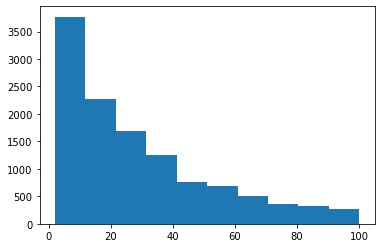

In [32]:
plt.hist([len(elm) for elm in comp if len(elm)<=100])

#### So the majority of the complex gene pattern is shorter than almost 50. And if this is because I removed the non-complex pattern, than maybe I need to re-do the fine tuning with all gene, before dividing them into complex and non-complex

In [36]:
all_css_lst=flatLst(css_gene_unit_lst_all)  # all gene list
len(all_css_lst)

43428

(array([4.1068e+04, 1.6180e+03, 4.5800e+02, 1.4700e+02, 7.7000e+01,
        2.5000e+01, 1.6000e+01, 6.0000e+00, 7.0000e+00, 6.0000e+00]),
 array([1.00000e+00, 1.14970e+03, 2.29840e+03, 3.44710e+03, 4.59580e+03,
        5.74450e+03, 6.89320e+03, 8.04190e+03, 9.19060e+03, 1.03393e+04,
        1.14880e+04]),
 <BarContainer object of 10 artists>)

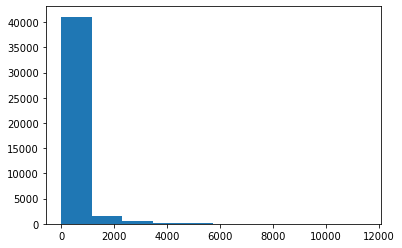

In [34]:
plt.hist([len(elm) for elm in all_css_lst])

(array([19793.,  7874.,  4265.,  2612.,  1762.,  1435.,   987.,   755.,
          587.,   465.]),
 array([   1. ,  100.9,  200.8,  300.7,  400.6,  500.5,  600.4,  700.3,
         800.2,  900.1, 1000. ]),
 <BarContainer object of 10 artists>)

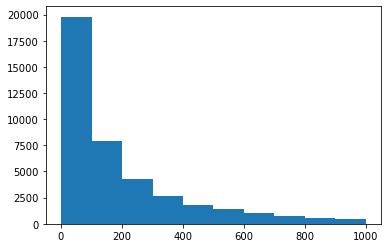

In [35]:
plt.hist([len(elm) for elm in all_css_lst if len(elm)<=1000])

#### Then what about the fixed length of DNABERT fine-tuning?

In [38]:
dna_train=pd.read_csv("../database/dnabert/examples/sample_data/ft/6/train.tsv", sep="\t")
dna_train.head()

,sequence,label
0,CACAGC ACAGCC CAGCCA AGCCAG GCCAGC CCAGCC CAGC...,0
1,CTAATC TAATCT AATCTA ATCTAG TCTAGT CTAGTA TAGT...,1
2,GGAAGA GAAGAG AAGAGG AGAGGG GAGGGA AGGGAA GGGA...,1
3,CGAAAG GAAAGC AAAGCA AAGCAA AGCAAT GCAATC CAAT...,1
4,TGACTC GACTCC ACTCCC CTCCCA TCCCAA CCCAAA CCAA...,1


In [45]:
dna_train_seq=[kmer2seq(elm) for elm in dna_train["sequence"].tolist()]

In [46]:
len(dna_train_seq)

32366

(array([    0.,     0.,     0.,     0.,     0., 32366.,     0.,     0.,
            0.,     0.]),
 array([100.5, 100.6, 100.7, 100.8, 100.9, 101. , 101.1, 101.2, 101.3,
        101.4, 101.5]),
 <BarContainer object of 10 artists>)

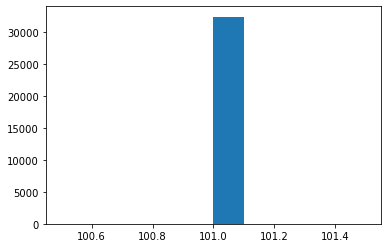

In [48]:
plt.hist([len(elm) for elm in dna_train_seq])

In [49]:
len(dna_train_seq[0])

101

#### Means that the "fixed" length for DNABERT fine-tuning dataset element is 101

Now then make it 101 for the gene data

In [50]:
comp_train=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/5mer/train.tsv",sep="\t")
comp_train.head()

,sequence,label
0,GGGGE GGGEE GGEEE GEEEE EEEEE EEEEE EEEEE EEEE...,0
1,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0
2,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,1
3,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0
4,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0


In [51]:
comp_train_seq=[kmer2seq(elm) for elm in comp_train["sequence"].tolist()]

AttributeError: 'float' object has no attribute 'split'

In [59]:
comp_train_type=[type(elm) for elm in comp_train["sequence"].tolist() if type(elm)=='float']

In [60]:
comp_train_type

[]